#Amazon Prime Dataset Analysis

##Importing Libraries and Previewing

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
import seaborn as sns

%matplotlib inline

###Reading CSV File

In [2]:
df = pd.read_csv("Google Drive/My Drive/Data Analysis/primeData.csv")
df.head()

,title,type,genres,releaseYear,imdbId,imdbAverageRating,imdbNumVotes,availableCountries
0,Blondie,movie,"Comedy, Family",1938.0,tt0029927,6.9,886.0,"US, ZA"
1,Ariel,movie,"Comedy, Crime, Romance",1988.0,tt0094675,7.4,8768.0,JP
2,Four Rooms,movie,Comedy,1995.0,tt0113101,6.7,112599.0,"AT, DE"
3,Judgment Night,movie,"Action, Crime, Drama",1993.0,tt0107286,6.6,19302.0,US
4,Forrest Gump,movie,"Drama, Romance",1994.0,tt0109830,8.8,2317973.0,"AD, AT, CU, DE, IN, JP, SN"


In [3]:
df.tail()

,title,type,genres,releaseYear,imdbId,imdbAverageRating,imdbNumVotes,availableCountries
67350,NaN,tv,NaN,2024.0,NaN,NaN,NaN,"GB, GG"
67351,NaN,tv,Kids,2019.0,NaN,NaN,NaN,"AO, BR, MZ"
67352,Modern Traveler,tv,Reality-TV,2016.0,tt5208558,NaN,NaN,IS
67353,NaN,tv,"Documentary, Crime",2024.0,NaN,NaN,NaN,BR
67354,Jimihen!! Jimiko o Kae Chau Jun Isei Kouyuu,tv,"Adult, Animation, Romance",2021.0,tt13490144,6.0,117.0,JP


This dataset has 8 columns with 67,354 rows.

In [4]:
df.describe()

,releaseYear,imdbAverageRating,imdbNumVotes
count,67188.000000,59538.000000,5.953800e+04
mean,2007.099140,5.948804,1.358679e+04
std,19.057085,1.370696,7.580746e+04
min,1902.000000,1.000000,5.000000e+00
25%,2003.000000,5.100000,1.050000e+02
50%,2014.000000,6.100000,4.550000e+02
75%,2019.000000,6.900000,2.380000e+03
max,2026.000000,9.900000,2.962241e+06


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67355 entries, 0 to 67354
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   title               65886 non-null  object 
 1   type                67355 non-null  object 
 2   genres              65531 non-null  object 
 3   releaseYear         67188 non-null  float64
 4   imdbId              61689 non-null  object 
 5   imdbAverageRating   59538 non-null  float64
 6   imdbNumVotes        59538 non-null  float64
 7   availableCountries  67355 non-null  object 
dtypes: float64(3), object(5)
memory usage: 4.1+ MB


Here we can see that some rows have null values in some columns because of the varying non-null count. Also, _releaseYear_ should be an int not a float. We can fix both issues when cleaning the data.

##Cleaning Data

###Cleaning Empty Cells

In [6]:
#Dropping Rows with Null Values
df.dropna(inplace=True)
#Checking if non-null rows are even
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 59492 entries, 0 to 67354
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   title               59492 non-null  object 
 1   type                59492 non-null  object 
 2   genres              59492 non-null  object 
 3   releaseYear         59492 non-null  float64
 4   imdbId              59492 non-null  object 
 5   imdbAverageRating   59492 non-null  float64
 6   imdbNumVotes        59492 non-null  float64
 7   availableCountries  59492 non-null  object 
dtypes: float64(3), object(5)
memory usage: 4.1+ MB


The non-null count in all rows matched, meaning we successfully deleted all rows that contained null values

###Cleaning Format

In [7]:
#Changing releaseYear from float to int
df['releaseYear'] = df['releaseYear'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 59492 entries, 0 to 67354
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   title               59492 non-null  object 
 1   type                59492 non-null  object 
 2   genres              59492 non-null  object 
 3   releaseYear         59492 non-null  int64  
 4   imdbId              59492 non-null  object 
 5   imdbAverageRating   59492 non-null  float64
 6   imdbNumVotes        59492 non-null  float64
 7   availableCountries  59492 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 4.1+ MB


_releaseYear_ was successfully changed to an int.

###Cleaning Incorrect Values

In [8]:
#Checking if imdbAverageRating is 1-10
print(df['imdbAverageRating'].max())
print(df['imdbAverageRating'].min())

9.9
1.0


The max and min are between 1-10 so it is not out of range.

###Removing Duplicates

In [9]:
df.drop_duplicates(inplace = True)

##Exploring the Data

In [10]:
#Creating a Correlation Matrix and Numerizing Object Columns
df_numerized = df.copy()

for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name]= df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes
        
correlation_matrix = df_numerized.corr()
print(correlation_matrix)

                       title      type    genres  releaseYear    imdbId  \
title               1.000000  0.005668  0.001683    -0.048343 -0.037294   
type                0.005668  1.000000 -0.051895     0.093638  0.069194   
genres              0.001683 -0.051895  1.000000     0.032445  0.061046   
releaseYear        -0.048343  0.093638  0.032445     1.000000  0.719127   
imdbId             -0.037294  0.069194  0.061046     0.719127  1.000000   
imdbAverageRating   0.036375  0.294953 -0.007719    -0.068297 -0.031226   
imdbNumVotes        0.019418 -0.018534 -0.090148    -0.012014 -0.071057   
availableCountries  0.009616 -0.051797  0.062633    -0.129894 -0.102729   

                    imdbAverageRating  imdbNumVotes  availableCountries  
title                        0.036375      0.019418            0.009616  
type                         0.294953     -0.018534           -0.051797  
genres                      -0.007719     -0.090148            0.062633  
releaseYear                 

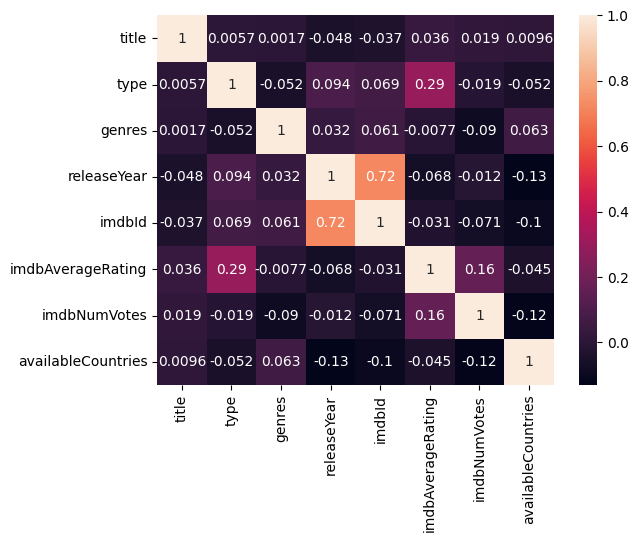

In [11]:
#Heatmap Matrix
sns.heatmap(correlation_matrix, annot = True)

plt.show()

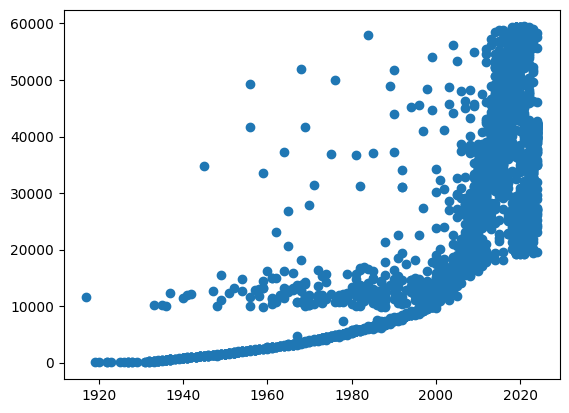

In [12]:
#Plotting Correlation Between Release Year and IMDB Id

df_sample = df_numerized.sample(5000)  # Randomly sample 5000 rows for plotting
plt.scatter(df_sample['releaseYear'], df_sample['imdbId'])
plt.show()

<Axes: title={'center': 'Number of Releases by Year'}, xlabel='releaseYear'>

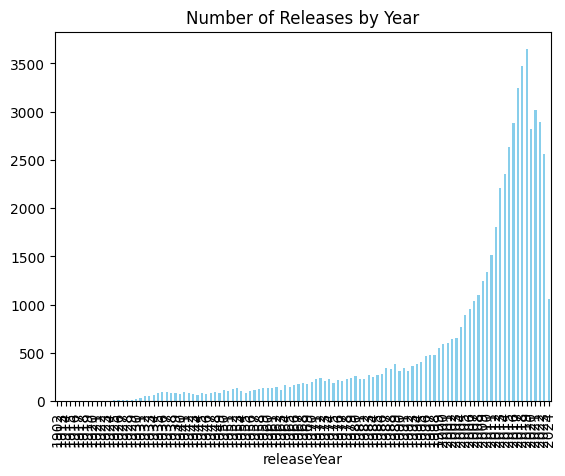

In [13]:
release_counts = df['releaseYear'].value_counts().sort_index()

release_counts.plot(kind='bar', color='skyblue', title='Number of Releases by Year')

There is an exponential correlation model between releaseYear and imdbId. Though, this makes sense because there is an exponential increase in releases.

In [14]:
#Exporting CSV
df.to_csv('Google Drive/My Drive/Data Analysis/output.csv', index=False)